# Patients Analysis

## 1. Understand Data

- included in Readme.MD

## 2. Acquire & Inspect the Data

Step 1: Import Relevant Modules

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from datetime import date
from matplotlib import pyplot as plt

Step 2: Read data into script

In [2]:

pre_auth = pd.read_csv("/Users/anuroxstar/Documents/Projects/PatientsAnalysis/data/Pre-Auth-Table 1.csv")

#clean trailing space in column name
pre_auth.rename(columns = lambda x: x.strip(), inplace = True)

patients_with_appts = pd.read_csv("/Users/anuroxstar/Documents/Projects/PatientsAnalysis/data/Patients w Appts-Table 1.csv")

#clean trailing space in column name
patients_with_appts.rename(columns=lambda x: x.strip(), inplace= True)

Step 3: Inspect Data

In [3]:

#Pre-Auth

print(pre_auth.head())
print(pre_auth.info())
print(pre_auth.shape)


#Patients With Appts

print(patients_with_appts.head())
print(patients_with_appts.info())
print(patients_with_appts.shape)


   PRE_AUTH_ID  PATIENT_ID  GENDER                   CREATED_AT      DOB  \
0        24875  10199347.0  Female  2023-04-08T07:00:36.424421Z   8/9/05   
1        32425         NaN  Female  2023-06-21T07:00:29.699999Z  8/10/95   
2        11002  10125628.0  Female  2022-12-06T07:00:29.669795Z  8/26/13   
3        12974  10141820.0  Female  2023-01-10T07:00:24.369702Z  9/23/97   
4        13650  10148106.0  Female  2023-01-19T07:00:23.555088Z   5/3/59   

    COVERAGE_START_DATE  Unnamed: 6  
0  2023-04-05T00:00:00Z         NaN  
1  2023-06-14T00:00:00Z         NaN  
2  2022-12-01T00:00:00Z         NaN  
3  2023-01-05T00:00:00Z         NaN  
4  2023-01-12T00:00:00Z         NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33238 entries, 0 to 33237
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PRE_AUTH_ID          33238 non-null  int64  
 1   PATIENT_ID           23319 non-null  float64
 2   GE

## 3. Data Cleaning

##  Pre Auth:
 Step 1: Reshape Data?
- data is tidy (tabular format)

Step 2: Remove duplicates

In [4]:
pre_auth = pre_auth.drop_duplicates()

Step 3: Remove irrelevant columns

In [5]:
pre_auth.drop("Unnamed: 6" ,axis =1, inplace = True)

Step 4: Missing Data?


In [6]:
print(pre_auth.info)

<bound method DataFrame.info of        PRE_AUTH_ID  PATIENT_ID  GENDER                   CREATED_AT       DOB  \
0            24875  10199347.0  Female  2023-04-08T07:00:36.424421Z    8/9/05   
1            32425         NaN  Female  2023-06-21T07:00:29.699999Z   8/10/95   
2            11002  10125628.0  Female  2022-12-06T07:00:29.669795Z   8/26/13   
3            12974  10141820.0  Female  2023-01-10T07:00:24.369702Z   9/23/97   
4            13650  10148106.0  Female  2023-01-19T07:00:23.555088Z    5/3/59   
...            ...         ...     ...                          ...       ...   
33233        32753         NaN    Male  2023-06-21T07:01:05.342721Z   3/26/02   
33234        27534         NaN  Female  2023-05-03T14:45:23.752108Z   6/21/61   
33235        12139         NaN  Female  2022-12-24T07:00:26.657712Z   9/20/12   
33236         3114         NaN    Male   2022-09-09T07:00:25.90864Z  10/29/10   
33237        12445         NaN  Female  2022-12-29T07:00:34.496878Z    2/3/88

Step 5: Clean up data types

In [7]:
pre_auth['PRE_AUTH_ID'] = pre_auth['PRE_AUTH_ID'].astype('string')
pre_auth['PRE_AUTH_ID'] = pre_auth['PRE_AUTH_ID'].replace(' ','')
pre_auth['GENDER'] = pre_auth['GENDER'].astype('string')
pre_auth['CREATED_AT'] = pd.to_datetime(pre_auth['CREATED_AT'])
pre_auth['DOB'] = pd.to_datetime(pre_auth['DOB'])
pre_auth['COVERAGE_START_DATE'] = pd.to_datetime(pre_auth['COVERAGE_START_DATE'])

Separate into table with PATIENT_ID, and table without PATIENT_ID

In [8]:
#First Table are pre-auth patients that booked an appt
pre_auth_book_appt = pre_auth[pre_auth['PATIENT_ID'].notna()]
pre_auth_book_appt['PATIENT_ID'] = pre_auth_book_appt['PATIENT_ID'].apply(np.int64)
pre_auth_book_appt['PATIENT_ID'] = pre_auth_book_appt['PATIENT_ID'].astype('string')
pre_auth_book_appt['PATIENT_ID'] = pre_auth_book_appt['PATIENT_ID'].replace(' ','')


#Second Table are pre-auth patients that did not book an appt
pre_auth_didnt_book_appt = pre_auth[pre_auth['PATIENT_ID'].isna()]
pre_auth_didnt_book_appt['PATIENT_ID'] = pre_auth_didnt_book_appt['PATIENT_ID'].astype('string')


Check accounted for all data in pre_auth dataset

In [9]:
pre_auth_tables_sum = pre_auth_book_appt.shape[0] + pre_auth_didnt_book_appt.shape[0]
print(pre_auth_tables_sum == pre_auth.shape[0])

True


##  Patients with Appts
 Step 1: Reshape Data?
- data is tidy (tabular format)

Step 2: Remove duplicates

In [10]:
patients_with_appts = patients_with_appts.drop_duplicates()

Step 3: Remove irrelevant columns

In [11]:
patients_with_appts.drop("Unnamed: 4" ,axis =1, inplace = True)

Step 4: Missing Data?

In [12]:
print(patients_with_appts.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23111 entries, 0 to 23110
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   PATIENT_ID                          23111 non-null  int64 
 1   FIRST_APPT_TIME_START               23111 non-null  object
 2   FIRST_NONCANCELLED_APPT_TIME_START  23111 non-null  object
 3   Source                              23071 non-null  object
dtypes: int64(1), object(3)
memory usage: 902.8+ KB
None


Step 5: Change Data Types

In [13]:
patients_with_appts['PATIENT_ID'] = patients_with_appts['PATIENT_ID'].astype('string')
patients_with_appts['PATIENT_ID'] = patients_with_appts['PATIENT_ID'].replace(' ','')
patients_with_appts['FIRST_APPT_TIME_START'] = patients_with_appts['FIRST_APPT_TIME_START'].replace('Z','')
patients_with_appts['FIRST_NONCANCELLED_APPT_TIME_START'] = patients_with_appts['FIRST_NONCANCELLED_APPT_TIME_START'].replace('Z','')
patients_with_appts['FIRST_APPT_TIME_START'] = pd.to_datetime(patients_with_appts['FIRST_APPT_TIME_START'])
patients_with_appts['FIRST_NONCANCELLED_APPT_TIME_START'] = pd.to_datetime(patients_with_appts['FIRST_NONCANCELLED_APPT_TIME_START'], errors = 'coerce')


In [14]:
print(patients_with_appts['Source'].value_counts())
# one row with Source as 'B'; assumed as 'db', will replace
patients_with_appts['Source'] = patients_with_appts['Source'].replace('B','db')

pre-auth    21830
db           1240
B               1
Name: Source, dtype: int64


# 4. Exploratory Data Analysis & Data Visualizations

In [15]:
patient_id_overlap = pre_auth_book_appt.merge(patients_with_appts, on = 'PATIENT_ID', how ='inner')

In [16]:
#Check for missing data
print(patient_id_overlap.shape)
print(patient_id_overlap.info())
print(patient_id_overlap['Source'].value_counts())

patient_id_overlap['Source'] = patient_id_overlap['Source'].str.replace('db','pre-auth')

#update patients_with_appts
patients_with_appts['Source'].update(patient_id_overlap['Source'])



(22496, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22496 entries, 0 to 22495
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   PRE_AUTH_ID                         22496 non-null  string             
 1   PATIENT_ID                          22496 non-null  string             
 2   GENDER                              22496 non-null  string             
 3   CREATED_AT                          22496 non-null  datetime64[ns, UTC]
 4   DOB                                 22496 non-null  datetime64[ns]     
 5   COVERAGE_START_DATE                 22496 non-null  datetime64[ns, UTC]
 6   FIRST_APPT_TIME_START               22496 non-null  datetime64[ns, UTC]
 7   FIRST_NONCANCELLED_APPT_TIME_START  20364 non-null  datetime64[ns, UTC]
 8   Source                              22458 non-null  object             
dtypes: datetime64[ns, UTC](4), da

In [17]:
#Check for duplicates:
print(pre_auth_book_appt[pre_auth_book_appt.duplicated(['PATIENT_ID'])].count())
print(pre_auth_book_appt[pre_auth_book_appt.duplicated(['PRE_AUTH_ID'])].count())
#further investigation
print(pre_auth_book_appt[pre_auth_book_appt['PATIENT_ID'].isin(
pre_auth_book_appt['PATIENT_ID'][pre_auth_book_appt['PATIENT_ID'].duplicated()])].sort_values('PATIENT_ID'))

#are there duplicate PATIENT_IDs in patients_with_appts?
print(patients_with_appts[patients_with_appts.duplicated(['PATIENT_ID'])].count())

PRE_AUTH_ID            12
PATIENT_ID             12
GENDER                 12
CREATED_AT             12
DOB                    12
COVERAGE_START_DATE    12
dtype: int64
PRE_AUTH_ID            0
PATIENT_ID             0
GENDER                 0
CREATED_AT             0
DOB                    0
COVERAGE_START_DATE    0
dtype: int64
      PRE_AUTH_ID PATIENT_ID  GENDER                       CREATED_AT  \
33149       14922   10100686    Male 2023-01-31 07:00:25.274071+00:00   
13396        4820   10100686  Female 2022-10-08 07:00:25.344381+00:00   
15817        5324   10101481  Female 2022-10-13 07:00:25.548282+00:00   
2616         5326   10101481  Female 2022-10-13 07:00:25.568682+00:00   
29567       20099   10103785  Female 2023-03-10 07:00:36.914151+00:00   
903          4980   10103785  Female 2022-10-12 07:00:23.811470+00:00   
12459        4181   10104632    Male 2022-09-30 07:00:24.475363+00:00   
28478        5672   10104632  Female 2022-10-19 07:00:23.873117+00:00   
12497      

In [18]:
# TABLES FOR ANALYSIS 

# TABLE 1: PRE-AUTH PTS with no APPTS

# TABLE 2: PATIENT_ID_OVERLAP: PRE-AUTH PTS with APPTS overlap with
# patients_with_appts dataset on PATIENT_ID

# TABLE 3: PRE_AUTH PTS with APPTS no overlap
cond = pre_auth_book_appt['PATIENT_ID'].isin(patient_id_overlap['PATIENT_ID'])
pre_auth_book_appt.drop(pre_auth_book_appt[cond].index, inplace = True)

# TABLE 4: PATIENTS WITH APPTS no overlap & Source == 'pre-auth'
cond = patients_with_appts['PATIENT_ID'].isin(patient_id_overlap['PATIENT_ID'])
patients_with_appts.drop(patients_with_appts[cond].index, inplace = True)
pre_auth_patients_with_appts = patients_with_appts[patients_with_appts['Source']== 'pre-auth']

# TABLE 5: PATIENTS WITH APPTS no overlap & Source == 'db'
db_appts = patients_with_appts[patients_with_appts['Source'] == 'db']

# TABLE 6: PATIENTS WITH APPTS no overlap & Source == null
unknown_appts = patients_with_appts[patients_with_appts['Source'].isna()]


In [19]:
#Pre-Auth Patients: Distinct Count
pre_auth_pts_distinct = (patient_id_overlap['PRE_AUTH_ID'].nunique() + pre_auth_book_appt['PRE_AUTH_ID'].nunique()
+ pre_auth_didnt_book_appt['PRE_AUTH_ID'].nunique() + pre_auth_patients_with_appts['PATIENT_ID'].nunique())

print(" The pre-authorized patients distinct count is: " + str(pre_auth_pts_distinct))

#Direct Booking Patients: Distinct Count
directbooking_pts_distinct = db_appts['PATIENT_ID'].nunique()
print(" The direct booking patients distinct count is: " + str(directbooking_pts_distinct))

#Total Number of Patients (including those that didnt book)
total_pts = (pre_auth_pts_distinct + directbooking_pts_distinct + unknown_appts['PATIENT_ID'].nunique())
print(" The total patients distinct count is: " + str(total_pts))

 The pre-authorized patients distinct count is: 33784
 The direct booking patients distinct count is: 80
 The total patients distinct count is: 33865


## Pre Auth patients
What is the % of patients that have their first_appt_time_start within 1 week (<= 7 days) of their coverage_start_date?

In [20]:
#check for missing data
print(len(patient_id_overlap[patient_id_overlap['COVERAGE_START_DATE'].isna()])/len(patient_id_overlap))
print(len(patient_id_overlap[patient_id_overlap['FIRST_APPT_TIME_START'].isna()])/len(patient_id_overlap))


print(patient_id_overlap.columns)
patient_id_overlap['time_to_book_appts'] = (patient_id_overlap['FIRST_APPT_TIME_START']
                                - patient_id_overlap['COVERAGE_START_DATE'])
patient_id_overlap['time_to_book_appts'] = patient_id_overlap['time_to_book_appts'].astype('string')
patient_id_overlap['time_to_book_appts'] = patient_id_overlap['time_to_book_appts'].replace(' ','')
patient_id_overlap[['time_to_book_days','time_to_book_time']] = patient_id_overlap['time_to_book_appts'].str.split('days', expand = True)
patient_id_overlap['time_to_book_days'] = patient_id_overlap['time_to_book_days'].astype(int)

book_appts_numerator = len(patient_id_overlap[(patient_id_overlap['time_to_book_days'] <= 7) & (patient_id_overlap['time_to_book_days'] >= 0)])
book_appts_denominator = len(patient_id_overlap[patient_id_overlap['time_to_book_days']>=0])

percent_book_appts = round(book_appts_numerator / book_appts_denominator * 100)
print(str(percent_book_appts) +"% of pre-authorized patients book their appointment within the first week.")

0.0
0.0
Index(['PRE_AUTH_ID', 'PATIENT_ID', 'GENDER', 'CREATED_AT', 'DOB',
       'COVERAGE_START_DATE', 'FIRST_APPT_TIME_START',
       'FIRST_NONCANCELLED_APPT_TIME_START', 'Source'],
      dtype='object')
12% of pre-authorized patients book their appointment within the first week.


b) What percent of patients end up rescheduling their first appointment?

In [21]:
pre_auth_appts = pd.concat([patient_id_overlap, pre_auth_patients_with_appts])

# check for missing data
print(round(len(pre_auth_appts[pre_auth_appts['FIRST_NONCANCELLED_APPT_TIME_START'].isna()])/len(pre_auth_appts)*100))

pre_auth_appts = pre_auth_appts.dropna(axis=0, subset=['FIRST_NONCANCELLED_APPT_TIME_START'])
pre_auth_rescheduled = pre_auth_appts.query('FIRST_APPT_TIME_START < FIRST_NONCANCELLED_APPT_TIME_START')

pre_auth_resched_numerator = len(pre_auth_rescheduled)
pre_auth_resched_denominator = len(pre_auth_appts)

percent_pre_auth_rescheduled = round(pre_auth_resched_numerator/pre_auth_resched_denominator *100)
print(str(percent_pre_auth_rescheduled) +"% of pre-authorized patients reschedule their appointment.")
pre_auth_rescheduled['time_to_resched'] = pre_auth_rescheduled['FIRST_NONCANCELLED_APPT_TIME_START'] - pre_auth_rescheduled['FIRST_APPT_TIME_START']
pre_auth_rescheduled['time_to_resched'] = pre_auth_rescheduled['time_to_resched'].astype(str).str.replace(' ','')
pre_auth_rescheduled[['time_to_resched_days','time_to_resched_time']] = pre_auth_rescheduled['time_to_resched'].str.split('days', expand = True)
pre_auth_rescheduled['time_to_resched_days'] = pre_auth_rescheduled['time_to_resched_days'].astype(int)
avg_days_resched_pre_auth = pre_auth_rescheduled['time_to_resched_days'].mean()
print("The average days for rescheduling for pre-authorized patients are " + str(round(avg_days_resched_pre_auth)) +" day(s).")


10
15% of pre-authorized patients reschedule their appointment.
The average days for rescheduling for pre-authorized patients are 17 day(s).


## Direct Booking patients
What percent of patients end up rescheduling their first appointment?

In [22]:

# check for missing data
print(round(len(db_appts[db_appts['FIRST_NONCANCELLED_APPT_TIME_START'].isna()])/len(db_appts)*100))

db_appts.dropna(axis= 0, subset=['FIRST_NONCANCELLED_APPT_TIME_START'])
db_rescheduled = db_appts.query('FIRST_APPT_TIME_START < FIRST_NONCANCELLED_APPT_TIME_START')

db_resched_numerator = len(db_rescheduled)
db_resched_denominator = len(db_appts)
percent_db_rescheduled = round(db_resched_numerator/db_resched_denominator * 100)
print(str(percent_db_rescheduled) +"% of direct booking patients reschedule their appointment.")
db_rescheduled['time_to_resched'] = db_rescheduled['FIRST_NONCANCELLED_APPT_TIME_START'] - db_rescheduled['FIRST_APPT_TIME_START']
db_rescheduled['time_to_resched'] = db_rescheduled['time_to_resched'].astype(str).str.replace(' ','')
db_rescheduled[['time_to_resched_days','time_to_resched_time']] = db_rescheduled['time_to_resched'].str.split('days', expand = True)
db_rescheduled['time_to_resched_days'] = db_rescheduled['time_to_resched_days'].astype(int)
avg_days_resched_db = db_rescheduled['time_to_resched_days'].mean()
print("The average days for rescheduling for direct booking patients are " + str(round(avg_days_resched_db)) +" day(s).")


4
1% of direct booking patients reschedule their appointment.
The average days for rescheduling for direct booking patients are 1 day(s).


What is the gender % of pre-authorized patients?

In [23]:
print(pre_auth['GENDER'].value_counts())
print(round(1084/len(pre_auth['GENDER'])*100))

pre_auth_female = pre_auth[pre_auth['GENDER']== 'Female']
pre_auth_male = pre_auth[pre_auth['GENDER']== 'Male']
percent_pre_auth_f = round(len(pre_auth_female)/(len(pre_auth_female)+len(pre_auth_male)) * 100)
percent_pre_auth_m = round(len(pre_auth_male)/(len(pre_auth_female)+len(pre_auth_male)) * 100)
print(str(percent_pre_auth_f)+ " % of pre-authorized patients are female.")
print(str(percent_pre_auth_m)+ " % of pre-authorized patients are male.")


Female    21987
Male      10167
0          1084
Name: GENDER, dtype: Int64
3
68 % of pre-authorized patients are female.
32 % of pre-authorized patients are male.


What % of pre-auth females and pre-auth males who book appts?

73 % of pre-authorized female patients book appointments.
67 % of pre-authorized male patients book appointments.


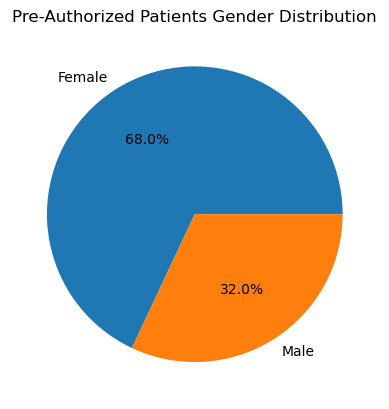

In [24]:
percent_pre_auth_f_book = round(len(pre_auth_female[pre_auth_female['PATIENT_ID'].notna()])
                                /len(pre_auth_female)*100)      
percent_pre_auth_m_book = round(len(pre_auth_male[pre_auth_male['PATIENT_ID'].notna()])
                                /len(pre_auth_male)*100)
print(str(percent_pre_auth_f_book)+ " % of pre-authorized female patients book appointments.")
print(str(percent_pre_auth_m_book)+ " % of pre-authorized male patients book appointments.")

#Pie Chart for Pre-Auth Gender Distribution
plt.pie([percent_pre_auth_f, percent_pre_auth_m],labels =['Female', 'Male'], autopct = '%0.1f%%')
plt.title('Pre-Authorized Patients Gender Distribution')
plt.savefig('Pre_Auth_gender_dist.jpg')
plt.show()
plt.close()


What is the age distribution of pre-authorized female and pre-authorized male patients?

0       2005-08-09
1       1995-08-10
2       2013-08-26
3       1997-09-23
4       2059-05-03
           ...    
33230   2007-08-28
33232   1995-06-30
33234   2061-06-21
33235   2012-09-20
33237   1988-02-03
Name: DOB, Length: 21987, dtype: datetime64[ns]
0          18  03:29:05.753424657
1          28  03:36:59.178082191
2          10  02:14:08.219178082
3          26  00:39:27.123287671
4        -36  +09:04:26.301369864
                   ...           
33230      16  02:14:08.219178082
33232      28  06:18:44.383561643
33234    -38  +05:47:10.684931507
33235      11  00:35:30.410958904
33237      35  16:06:34.520547945
Name: Age, Length: 21987, dtype: object
0         18
1         28
2         10
3         26
4        -36
        ... 
33230     16
33232     28
33234    -38
33235     11
33237     35
Name: Age (yrs), Length: 21987, dtype: object
(3, 14]     26.0
(30, 40]    23.0
(21, 30]    23.0
(14, 21]    14.0
(40, 50]    13.0
Name: Age (yrs), dtype: float64


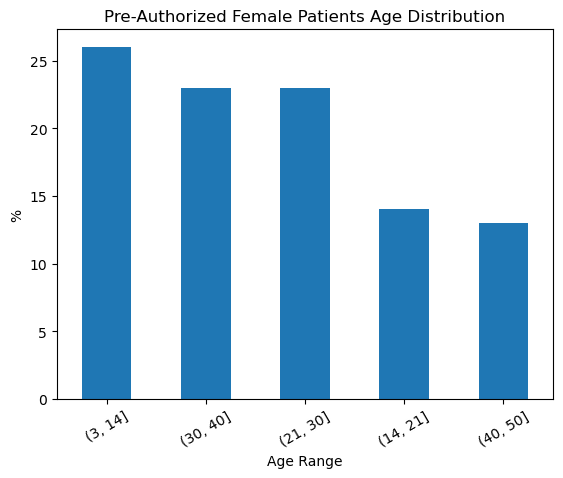

In [25]:
# Pre-Auth Females
print(pre_auth_female['DOB'])
today = pd.to_datetime('today').date()
today = pd.to_datetime(today)
pre_auth_female['Age'] = ((today - (pre_auth_female['DOB'][pre_auth_female['DOB'].notna()]))/365)
pre_auth_female['Age'] = pre_auth_female['Age'].astype(str)
pre_auth_female['Age'] = pre_auth_female['Age'].str.replace('days' ,'')
print(pre_auth_female['Age'])
pre_auth_female[['Age (yrs)','time(ignore)']] = pre_auth_female['Age'].str.split('  ', expand = True)
print(pre_auth_female['Age (yrs)'])
pre_auth_female['Age (yrs)'] = pre_auth_female['Age (yrs)'].astype(int)
pre_auth_female = pre_auth_female[pre_auth_female['Age (yrs)'] >= 3]
pre_auth_female_age_dist = round((pd.cut(pre_auth_female['Age (yrs)'],[3,14,21,30,40,50]).value_counts())/ len(pre_auth_female) * 100)
print (pre_auth_female_age_dist)
ax = pre_auth_female_age_dist.plot.bar()
plt.title('Pre-Authorized Female Patients Age Distribution')
plt.xlabel('Age Range')
plt.xticks(rotation = 30)
plt.ylabel('%')
fig=ax.get_figure()
fig.savefig('Pre_Auth_Female_Age_Dist.jpg')
plt.show()
plt.close()

15      2006-09-06
16      1974-04-21
17      1976-11-07
21      2008-08-09
23      2009-10-08
           ...    
33228   1992-09-25
33229   2000-03-18
33231   1997-11-19
33233   2002-03-26
33236   2010-10-29
Name: DOB, Length: 10167, dtype: datetime64[ns]
15       17  01:38:37.808219178
16       49  11:14:37.808219178
17       46  22:01:38.630136986
21       15  03:25:09.041095890
23       13  23:28:26.301369863
                  ...          
33228    31  00:35:30.410958904
33229    23  13:01:09.041095890
33231    25  20:54:34.520547945
33233    21  12:29:35.342465753
33236    12  22:05:35.342465753
Name: Age, Length: 10167, dtype: object
15       17
16       49
17       46
21       15
23       13
         ..
33228    31
33229    23
33231    25
33233    21
33236    12
Name: Age (yrs), Length: 10167, dtype: object
(3, 14]     38.0
(30, 40]    20.0
(21, 30]    18.0
(40, 50]    12.0
(14, 21]    12.0
Name: Age (yrs), dtype: float64


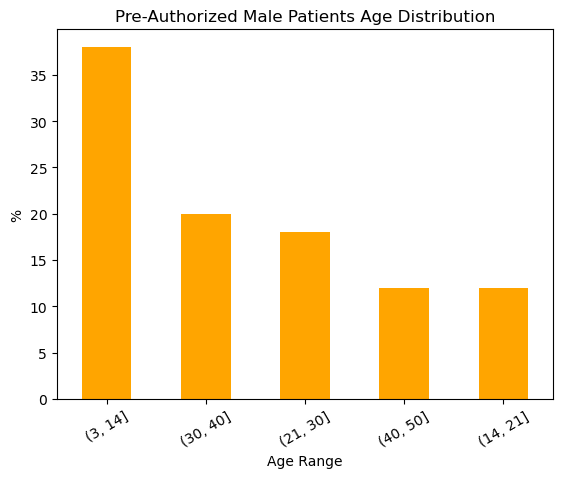

In [26]:
# Pre-Auth Males
print(pre_auth_male['DOB'])
today = pd.to_datetime('today').date()
today = pd.to_datetime(today)
pre_auth_male['Age'] = ((today - pre_auth_male['DOB'])/365)
pre_auth_male['Age'] = pre_auth_male['Age'].astype(str)
pre_auth_male['Age'] = pre_auth_male['Age'].str.replace('days' ,'')
print(pre_auth_male['Age'])
pre_auth_male[['Age (yrs)','time(ignore)']] = pre_auth_male['Age'].str.split('  ', expand = True)
print(pre_auth_male['Age (yrs)'])
pre_auth_male['Age (yrs)'] = pre_auth_male['Age (yrs)'].astype(int)
pre_auth_male = pre_auth_male[pre_auth_male['Age (yrs)'] >= 3]

pre_auth_male_age_dist = round((pd.cut(pre_auth_male['Age (yrs)'],[3,14,21,30,40,50]).value_counts())/ len(pre_auth_male) * 100)
print(pre_auth_male_age_dist)
ax = pre_auth_male_age_dist.plot.bar(color ='orange')
plt.title('Pre-Authorized Male Patients Age Distribution')
plt.xlabel('Age Range')
plt.xticks(rotation = 30)
plt.ylabel('%')
fig=ax.get_figure()
fig.savefig('Pre_Auth_Male_Age_Dist.jpg')
plt.show()